In [53]:
# pip install pytesseract
# !pip install tesseract
# !sudo apt install tesseract-ocr

### **Step 1: showing the original image having bold and non-bold text with same font size and same colour**

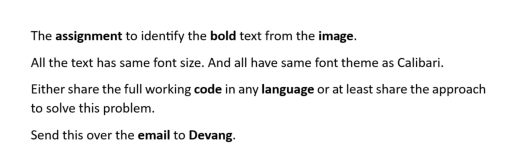

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image path
image_path = '/content/bold_text.png'

# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

### **Step2: Doing preprocessing on image and only having bold text in image in the output image**

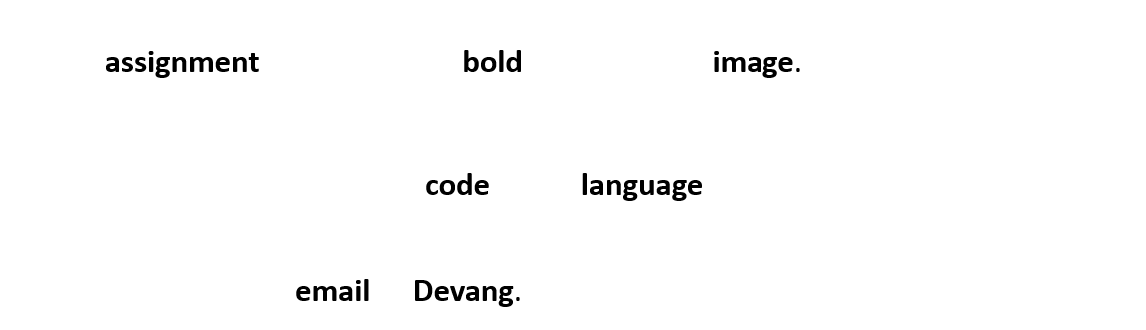

In [54]:
import cv2
import numpy as np
# Reading the image
img = cv2.imread('/content/bold_text.png')
# converting the image to greyscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Doing threshold on the image to convert pixel values greater 160 as 255 and other as 0
thresh = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)[1]

# defining a kernel of 5*5 matrix having each value as 1
# we will hover over the image using this kernel for dilation

kernel = np.ones((5,5),np.uint8)
# defining a kernel of 3*3 matrix having each value as 1
# we will hover over the image using this kernel for erosion
kernel2 = np.ones((3,3),np.uint8)
marker = cv2.dilate(thresh,kernel,iterations = 1)
mask=cv2.erode(thresh,kernel,iterations = 1)

while True:
    tmp=marker.copy()
    marker=cv2.erode(marker, kernel2)
    marker=cv2.max(mask, marker)
    difference = cv2.subtract(tmp, marker)
    if cv2.countNonZero(difference) == 0:
        break
# Convert Marker Image to Color
marker_color = cv2.cvtColor(marker, cv2.COLOR_GRAY2BGR)
# Combining the Original Image and Marker Image:
out=cv2.bitwise_or(img, marker_color)
# writing the image to the directory
cv2.imwrite('out.png', out)
# showing the final output image
cv2_imshow(out)

### **Step 3: Extracting the text from the image which is bold only**

In [60]:
# Load the image
img = cv2.imread('/content/out.png')

# Extract the text from the image using pytesseract library
text = pytesseract.image_to_string(img)
print(text)

assignment bold image.

code language

email Devang.

